In [184]:
import sys; print(sys.version)
import pandas as pd; print(pd.__version__)
import random
import matplotlib; print(matplotlib.__version__)
from matplotlib import pyplot as plt

3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]
2.0.2
3.7.1


## Histogrammer

Lad os simulere kast med en terning 100 gange og gemme udfaldet

In [185]:
dice_rolls = pd.Series([random.randint(1, 6) for _ in range(0, 100)])

Et histogram viser os det samlede antal af 1'ere, 2'ere osv.

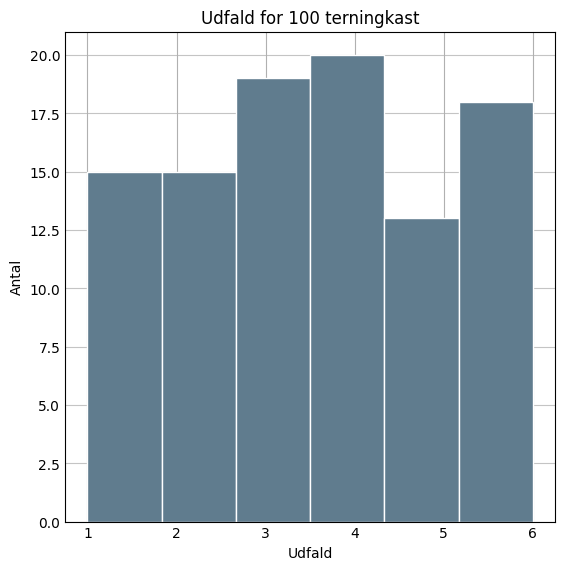

In [186]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.hist(dice_rolls, bins=6, color='#607c8e',edgecolor="white")
plt.title('Udfald for 100 terningkast')
plt.xlabel('Udfald')
plt.ylabel('Antal')
plt.grid(axis='y', alpha=0.75)

## Trappediagram

Man kan repræsentere de samme information fra et histogram i et trappediagram. 
Forskellen består i, at vi akkumulerer søjlerne fra histogrammet.
Man kan gå fra et histogram til et trappediagram og tilbage igen uden at miste information.

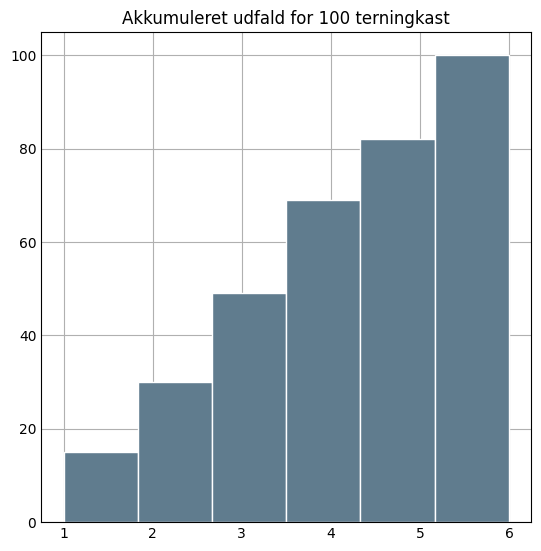

In [187]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.hist(dice_rolls, bins=6, color='#607c8e',edgecolor="white", cumulative=True)
_ = plt.title('Akkumuleret udfald for 100 terningkast')

## Definition af fraktil

p%-fraktilen er det tal, der adskiller de p% mindste observationer fra de (100 - p)% største observationer.

25%-fraktilen kaldes også for 25%-kvartilen og tilsvarende kaldes 75%-fraktilen kaldes for 75%-kvartilen

50%-fraktilen kaldes typisk for medianen.

På engelsk taler man om Rank statistics, da der her bruges en "ordning" (størrelseorden) for at bestemme fraktiler.

Lad os simulerer 100 tilfældige tal mellem 1 og 100 og sortere dem i stigende rækkefølge.

In [188]:
liste_af_tal  = pd.Series([random.randint(1, 100) for x in range(0,100)]).sort_values(ascending=True)
upper_quantile = liste_af_tal.quantile(0.95, interpolation='nearest')

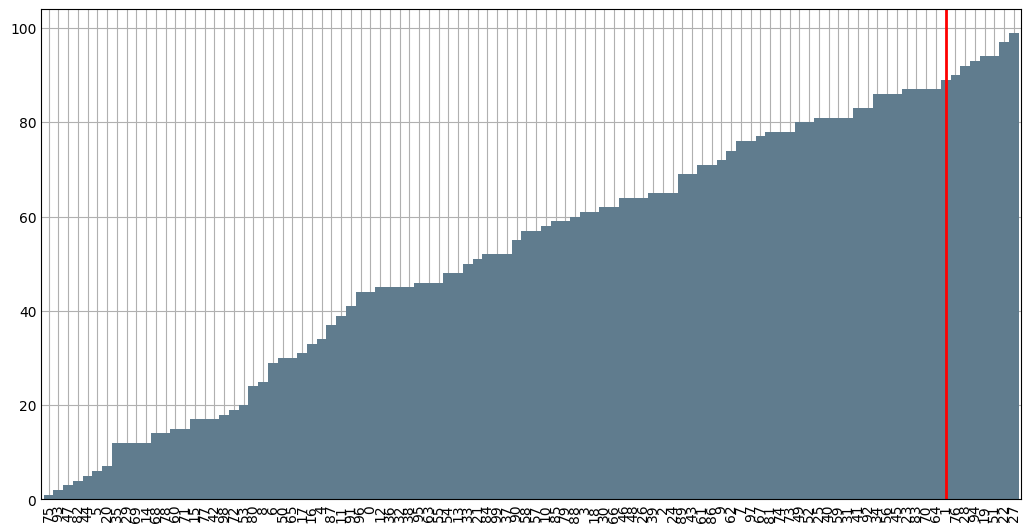

In [189]:
ax = liste_af_tal.plot
bar = ax.bar(grid=True, width=1.0, color='#607c8e', figsize=(10, 5))
_ = bar.axvline(x=upper_quantile, color= 'red', linewidth=2,)

In [2]:
from ipywidgets import interact
%matplotlib inline
import numpy as np
from scipy.stats import chi2
from scipy.stats import t
import matplotlib.pyplot as plt

# wrap a few graph generation functions so they have the same signature

In [25]:
df = 55

def foo(df, loc, scale):
    return np.linspace(chi2.ppf(0.01, df, loc, scale),chi2.ppf(0.99, df, loc, scale), 100)

def plot_random_graph(df, loc, scale):
    g =foo(df, loc, scale)
    fig, ax = plt.subplots(1, 1)
    ax.plot(g, chi2.pdf(g, df, loc, scale), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
    plt.show()

In [27]:
interact(plot_random_graph, df=(0.01,100), loc=(0,2), scale=(1,2));

interactive(children=(FloatSlider(value=50.004999999999995, description='df', min=0.01), IntSlider(value=1, de…

In [9]:
df = 55

def foo(df):
    return np.linspace(t.ppf(0.001, df),chi2.ppf(0.99, df), 100)

def plot_random_graph(df):
    g =foo(df)
    fig, ax = plt.subplots(1, 1)
    ax.plot(g, t.pdf(g, df), 'r-', lw=5, alpha=0.6, label='t pdf')
    plt.show()

In [10]:
interact(plot_random_graph, df=(1,100));

interactive(children=(IntSlider(value=50, description='df', min=1), Output()), _dom_classes=('widget-interact'…